In [1]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn import *
from statistics import *

In [2]:
data = pd.read_csv ('Standardized_ot.csv',sep=',',dtype= np.float64)
x = data.iloc[:, 0:120]
y = data.iloc[:, 120]

In [ ]:
#Gradient Boosting
t1 = time.process_time()
n_repeat = 5
outer_cv = KFold(n_splits=5, shuffle=True, random_state=7)

GBrmse = []
GBmae = []
GBr2 = []
for i in range(n_repeat):
    for train_idx, test_idx in outer_cv.split(x, y):
        train_data, test_data = x.iloc[train_idx], x.iloc[test_idx]
        train_target = y.iloc[train_idx]
    
        model = ensemble.GradientBoostingRegressor(n_estimators= 1000, learning_rate= 0.1, loss= 'ls')
    
        classifier = model.fit(train_data, train_target)
        y_pred = classifier.predict(test_data)
        rmsee = np.sqrt(metrics.mean_squared_error(y.iloc[test_idx], y_pred))
        maee = metrics.mean_absolute_error(y.iloc[test_idx], y_pred)
        r22 = metrics.r2_score(y.iloc[test_idx], y_pred)
        GBrmse.append(rmsee)
        GBmae.append(maee)
        GBr2.append(r22)
        #print(rmse)
t2 = time.process_time()
print('Time is ', str(t2-t1), ' secs \n')
print('Rmse per split: ', GBrmse)
print('Mae per split: ', GBmae)
print('R2 per split: ', GBr2)
print('Mean RMSE: ', mean(GBrmse))
print('Mean MAE: ', mean(GBmae))
print('Mean R2: ', mean(GBr2))

Time is  500.02796573999996  secs 

Rmse per split:  [7.949233691098554, 7.955316177879415, 8.63392235979461, 8.150358150076404, 8.288628923362886, 7.949233691098553, 7.955316177879412, 8.63392235979461, 8.144358882388326, 8.285200033098022, 7.949233691098553, 7.955316177879415, 8.633922359794612, 8.144638611915568, 8.285268216701652, 7.949233691098552, 7.955316177879415, 8.633922359794612, 8.148381474236407, 8.288218263074334, 7.949233691098552, 7.955316177879413, 8.63392235979461, 8.14817939310851, 8.288628923362884]
Mae per split:  [5.899165184733894, 5.987505855351171, 6.2823449626452526, 5.925301121378633, 6.047375566075294, 5.899165184733895, 5.987505855351168, 6.2823449626452526, 5.916656056925782, 6.044484347444401, 5.899165184733895, 5.98750585535117, 6.282344962645253, 5.916656056925782, 6.044755956819128, 5.899165184733894, 5.987505855351171, 6.282344962645253, 5.921333463198698, 6.046842323846553, 5.899165184733894, 5.987505855351168, 6.2823449626452526, 5.920623715105717, 

In [ ]:
#Multilayer Perceptron
t1 = time.process_time()
n_repeat = 5
outer_cv = KFold(n_splits=5, shuffle=True, random_state=7)

MLPrmse = []
MLPmae = []
MLPr2 = []
for i in range(n_repeat):
    for train_idx, test_idx in outer_cv.split(x, y):
        train_data, test_data = x.iloc[train_idx], x.iloc[test_idx]
        train_target = y.iloc[train_idx]
    
        model = neural_network.MLPRegressor(hidden_layer_sizes=500, activation='relu', max_iter=500, solver='adam', alpha=0.1, batch_size='auto', 
                                            learning_rate='adaptive', learning_rate_init=0.01, shuffle=True, random_state=7)
    
        classifier = model.fit(train_data, train_target)
        y_pred = classifier.predict(test_data)
        rmsee = np.sqrt(metrics.mean_squared_error(y.iloc[test_idx], y_pred))
        maee = metrics.mean_absolute_error(y.iloc[test_idx], y_pred)
        r22 = metrics.r2_score(y.iloc[test_idx], y_pred)
        MLPrmse.append(rmsee)
        MLPmae.append(maee)
        MLPr2.append(r22)
        #print(rmse)
t2 = time.process_time()
print('Time is ', str(t2-t1), ' secs \n')
print('Rmse per split: ', MLPrmse)
print('Mae per split: ', MLPmae)
print('R2 per split: ', MLPr2)
print('Mean RMSE: ', mean(MLPrmse))
print('Mean MAE: ', mean(MLPmae))
print('Mean R2: ', mean(MLPr2))

Time is  536.9432332800001  secs 

Rmse per split:  [6.967194404303338, 7.224807812831991, 7.410566340694952, 6.682463264124097, 6.36692305981543, 6.967194404303338, 7.224807812831991, 7.410566340694952, 6.682463264124097, 6.36692305981543, 6.967194404303338, 7.224807812831991, 7.410566340694952, 6.682463264124097, 6.36692305981543, 6.967194404303338, 7.224807812831991, 7.410566340694952, 6.682463264124097, 6.36692305981543, 6.967194404303338, 7.224807812831991, 7.410566340694952, 6.682463264124097, 6.36692305981543]
Mae per split:  [5.3711296813989495, 5.576394158360664, 5.6706526804957775, 5.13007925055761, 4.852490196418338, 5.3711296813989495, 5.576394158360664, 5.6706526804957775, 5.13007925055761, 4.852490196418338, 5.3711296813989495, 5.576394158360664, 5.6706526804957775, 5.13007925055761, 4.852490196418338, 5.3711296813989495, 5.576394158360664, 5.6706526804957775, 5.13007925055761, 4.852490196418338, 5.3711296813989495, 5.576394158360664, 5.6706526804957775, 5.13007925055761,

In [ ]:
#Random Forest
t1 = time.process_time()
n_repeat = 5
outer_cv = KFold(n_splits=5, shuffle=True, random_state=7)

RFrmse = []
RFmae = []
RFr2 = []
for i in range(n_repeat):
    for train_idx, test_idx in outer_cv.split(x, y):
        train_data, test_data = x.iloc[train_idx], x.iloc[test_idx]
        train_target = y.iloc[train_idx]
    
        model = ensemble.RandomForestRegressor(n_estimators= 1000, random_state=7)
    
        classifier = model.fit(train_data, train_target)
        y_pred = classifier.predict(test_data)
        rmsee = np.sqrt(metrics.mean_squared_error(y.iloc[test_idx], y_pred))
        maee = metrics.mean_absolute_error(y.iloc[test_idx], y_pred)
        r22 = metrics.r2_score(y.iloc[test_idx], y_pred)
        RFrmse.append(rmsee)
        RFmae.append(maee)
        RFr2.append(r22)
        #print(rmse)
t2 = time.process_time()
print('Time is ', str(t2-t1), ' secs \n')
print('Rmse per split: ', RFrmse)
print('Mae per split: ', RFmae)
print('R2 per split: ', RFr2)
print('Mean RMSE: ', mean(RFrmse))
print('Mean MAE: ', mean(RFmae))
print('Mean R2: ', mean(RFr2))

Time is  1402.28558489  secs 

Rmse per split:  [7.136264419159428, 6.967024833068859, 7.8414821469780875, 7.458785472406993, 6.918734393521745, 7.136264419159428, 6.967024833068859, 7.8414821469780875, 7.458785472406993, 6.918734393521745, 7.136264419159428, 6.967024833068859, 7.8414821469780875, 7.458785472406993, 6.918734393521745, 7.136264419159428, 6.967024833068859, 7.8414821469780875, 7.458785472406993, 6.918734393521745, 7.136264419159428, 6.967024833068859, 7.8414821469780875, 7.458785472406993, 6.918734393521745]
Mae per split:  [4.800539825268815, 4.5649840322580735, 5.122467459677413, 4.964460336021501, 4.615141615074033, 4.800539825268815, 4.5649840322580735, 5.122467459677413, 4.964460336021501, 4.615141615074033, 4.800539825268815, 4.5649840322580735, 5.122467459677413, 4.964460336021501, 4.615141615074033, 4.800539825268815, 4.5649840322580735, 5.122467459677413, 4.964460336021501, 4.615141615074033, 4.800539825268815, 4.5649840322580735, 5.122467459677413, 4.9644603360

In [3]:
#Voting Ensemble
t1 = time.process_time()

models = list()
mlp = neural_network.MLPRegressor(hidden_layer_sizes=500, activation='relu', max_iter=500, solver='adam', alpha=0.1, batch_size='auto', 
                                            learning_rate='adaptive', learning_rate_init=0.01, shuffle=True, random_state=7)
gbr = ensemble.GradientBoostingRegressor(n_estimators= 1000, learning_rate= 0.1, loss= 'ls')
rf = ensemble.RandomForestRegressor(n_estimators= 1000, random_state=7)

models.append(('mlp', mlp))
models.append(('gbr', gbr))
models.append(('rf', rf))

n_repeat = 5
outer_cv = KFold(n_splits=5, shuffle=True, random_state=7)

rmse = []
mae = []
r2 = []
for i in range(n_repeat):
    for train_idx, test_idx in outer_cv.split(x, y):
        train_data, test_data = x.iloc[train_idx], x.iloc[test_idx]
        train_target = y.iloc[train_idx]
    
        model = ensemble.VotingRegressor(estimators=models, n_jobs=-1)
    
        classifier = model.fit(train_data, train_target)
        y_pred = classifier.predict(test_data)
        rmsee = np.sqrt(metrics.mean_squared_error(y.iloc[test_idx], y_pred))
        maee = metrics.mean_absolute_error(y.iloc[test_idx], y_pred)
        r22 = metrics.r2_score(y.iloc[test_idx], y_pred)
        rmse.append(rmsee)
        mae.append(maee)
        r2.append(r22)
        #print(rmse)
t2 = time.process_time()
print('Time is ', str(t2-t1), ' secs \n')
print('Rmse per split: ', rmse)
print('Mae per split: ', mae)
print('R2 per split: ', r2)
print('Mean RMSE: ', mean(rmse))
print('Mean MAE: ', mean(mae))
print('Mean R2: ', mean(r2))

Time is  42.211898443  secs 

Rmse per split:  [6.329184671935298, 6.204278347751928, 6.945790346778495, 6.415782298796623, 6.239563682198441, 6.329184671935296, 6.204278347751928, 6.945790346778495, 6.415943623861708, 6.2386760739463645, 6.329184671935297, 6.204278347751928, 6.945790346778495, 6.42058912768454, 6.238772612628743, 6.329184671935296, 6.204278347751928, 6.94594088052907, 6.41966452847138, 6.237896424120965, 6.329184671935296, 6.204278347751928, 6.945790346778495, 6.412442594663867, 6.239563682198442]
Mae per split:  [4.607520079543683, 4.497535649981308, 4.90987716138976, 4.591842857588474, 4.488111285211256, 4.607520079543682, 4.497535649981309, 4.90987716138976, 4.592928827617458, 4.487238082125868, 4.607520079543682, 4.497535649981308, 4.909877161389759, 4.5960470984660695, 4.48741582953545, 4.607520079543682, 4.497535649981309, 4.910268142006587, 4.594724545739425, 4.486452089991818, 4.607520079543682, 4.497535649981308, 4.909877161389759, 4.590283722164169, 4.488111

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
from google.colab import files

#Using latex engine give a more beautiful plot
rc('font', **{'family':'serif'})
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-11).
dvipng is already the newest version (1.15-1).
texlive-fonts-extra is already the newest version (2017.20180305-2).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

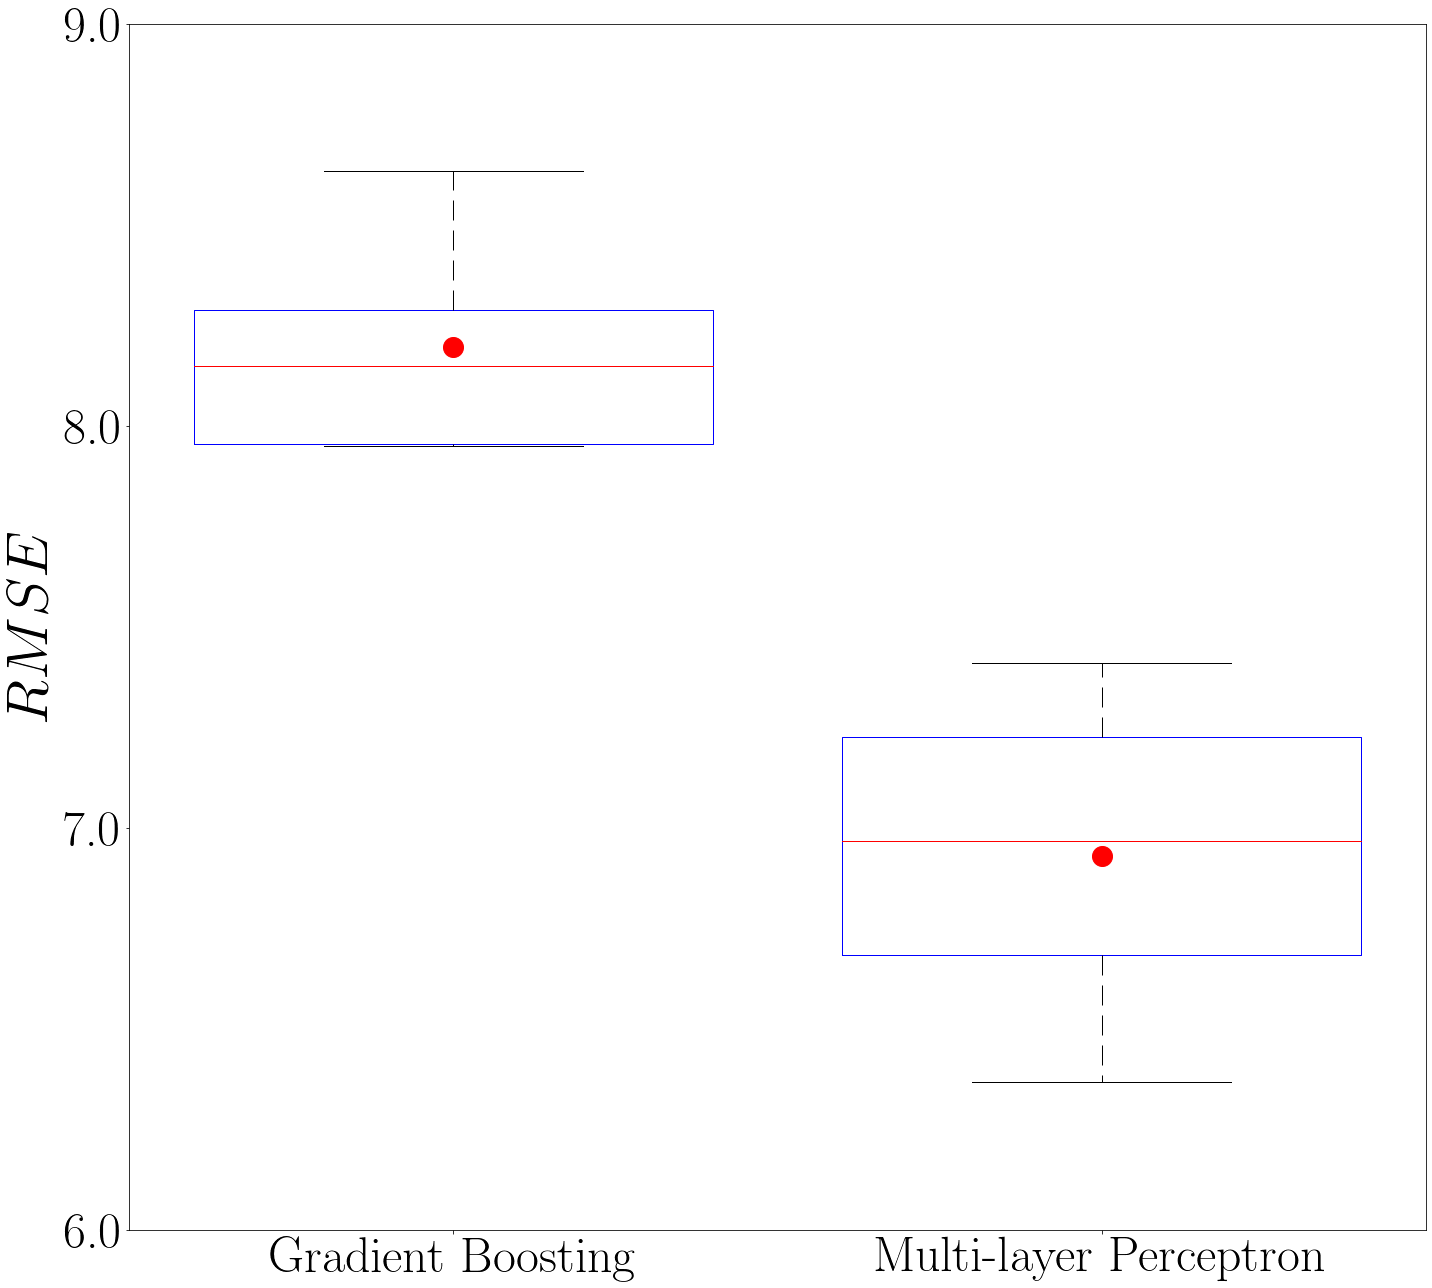

In [ ]:
fig, ax = plt.subplots(figsize=(20,18))
ynumbers = np.linspace(6.0,9.0,4) #scale of your x-axis
box_plot_data = [GBrmse, MLPrmse] #list your models in the order you want
label = ['Gradient Boosting','Multi-layer Perceptron'] #provide the label - this will be displayed on your x-axis

bp = ax.boxplot(box_plot_data,labels=label, widths = 0.8,vert=1,showmeans=True)
for box in bp['boxes']:
    # change outline color
    box.set(color='blue')
    # box.set(facecolor = 'white')
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black',linestyle='dashed',dashes=[20,10])

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='black')

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='red')

## change color and linewidth of the means
for mean in bp['means']:
    mean.set(marker='o',color='red')
    mean.set(markerfacecolor='red',markersize=20,markeredgecolor='red')


# linestyle='dashed', marker='o', markerfacecolor='blue', markersize=12

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='+', color='red')
    flier.set(markerfacecolor='red',markersize=20,markeredgecolor='red', alpha=1.0)
##don't border much stop

ax.set_xticklabels(label,fontsize=50)
plt.yticks(ynumbers)
ax.set_yticklabels(ynumbers,fontsize=50)
# ax.invert_xaxis()  # labels read top-to-bottom
ax.set_ylabel('$RMSE$',fontsize=60)
fig.tight_layout()
#plt.savefig('tomi.pdf', dpi=600) #save your plot as pdf
plt.savefig("RMSE_All.jpg", format="jpg", dpi=900)
files.download('RMSE_All.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

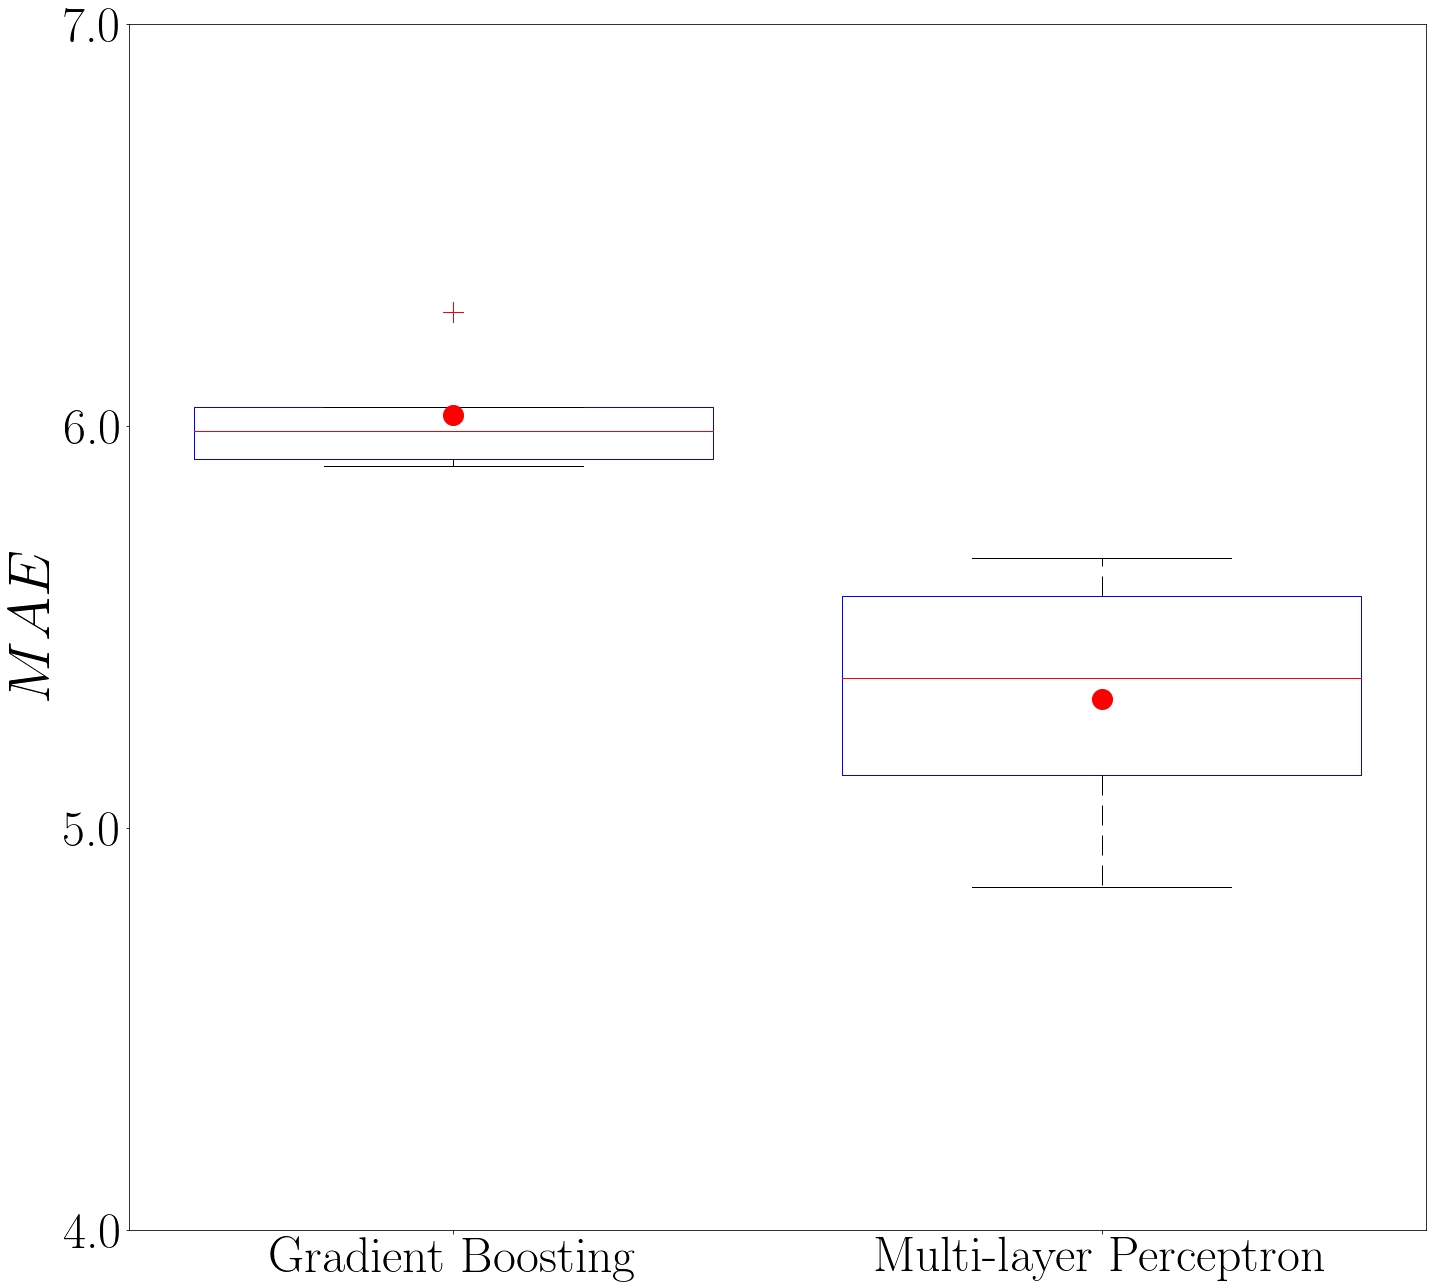

In [ ]:
fig, ax = plt.subplots(figsize=(20,18))
ynumbers = np.linspace(4.0,7.0,4) #scale of your x-axis
box_plot_data = [GBmae, MLPmae] #list your models in the order you want
label = ['Gradient Boosting','Multi-layer Perceptron'] #provide the label - this will be displayed on your x-axis

bp = ax.boxplot(box_plot_data,labels=label, widths = 0.8,vert=1,showmeans=True)
for box in bp['boxes']:
    # change outline color
    box.set(color='blue')
    # box.set(facecolor = 'white')
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black',linestyle='dashed',dashes=[20,10])

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='black')

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='red')

## change color and linewidth of the means
for mean in bp['means']:
    mean.set(marker='o',color='red')
    mean.set(markerfacecolor='red',markersize=20,markeredgecolor='red')


# linestyle='dashed', marker='o', markerfacecolor='blue', markersize=12

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='+', color='red')
    flier.set(markerfacecolor='red',markersize=20,markeredgecolor='red', alpha=1.0)
##don't border much stop

ax.set_xticklabels(label,fontsize=50)
plt.yticks(ynumbers)
ax.set_yticklabels(ynumbers,fontsize=50)
# ax.invert_xaxis()  # labels read top-to-bottom
ax.set_ylabel('$MAE$',fontsize=60)
fig.tight_layout()
plt.savefig("MAE_All.jpg", format="jpg", dpi=900)
files.download('MAE_All.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

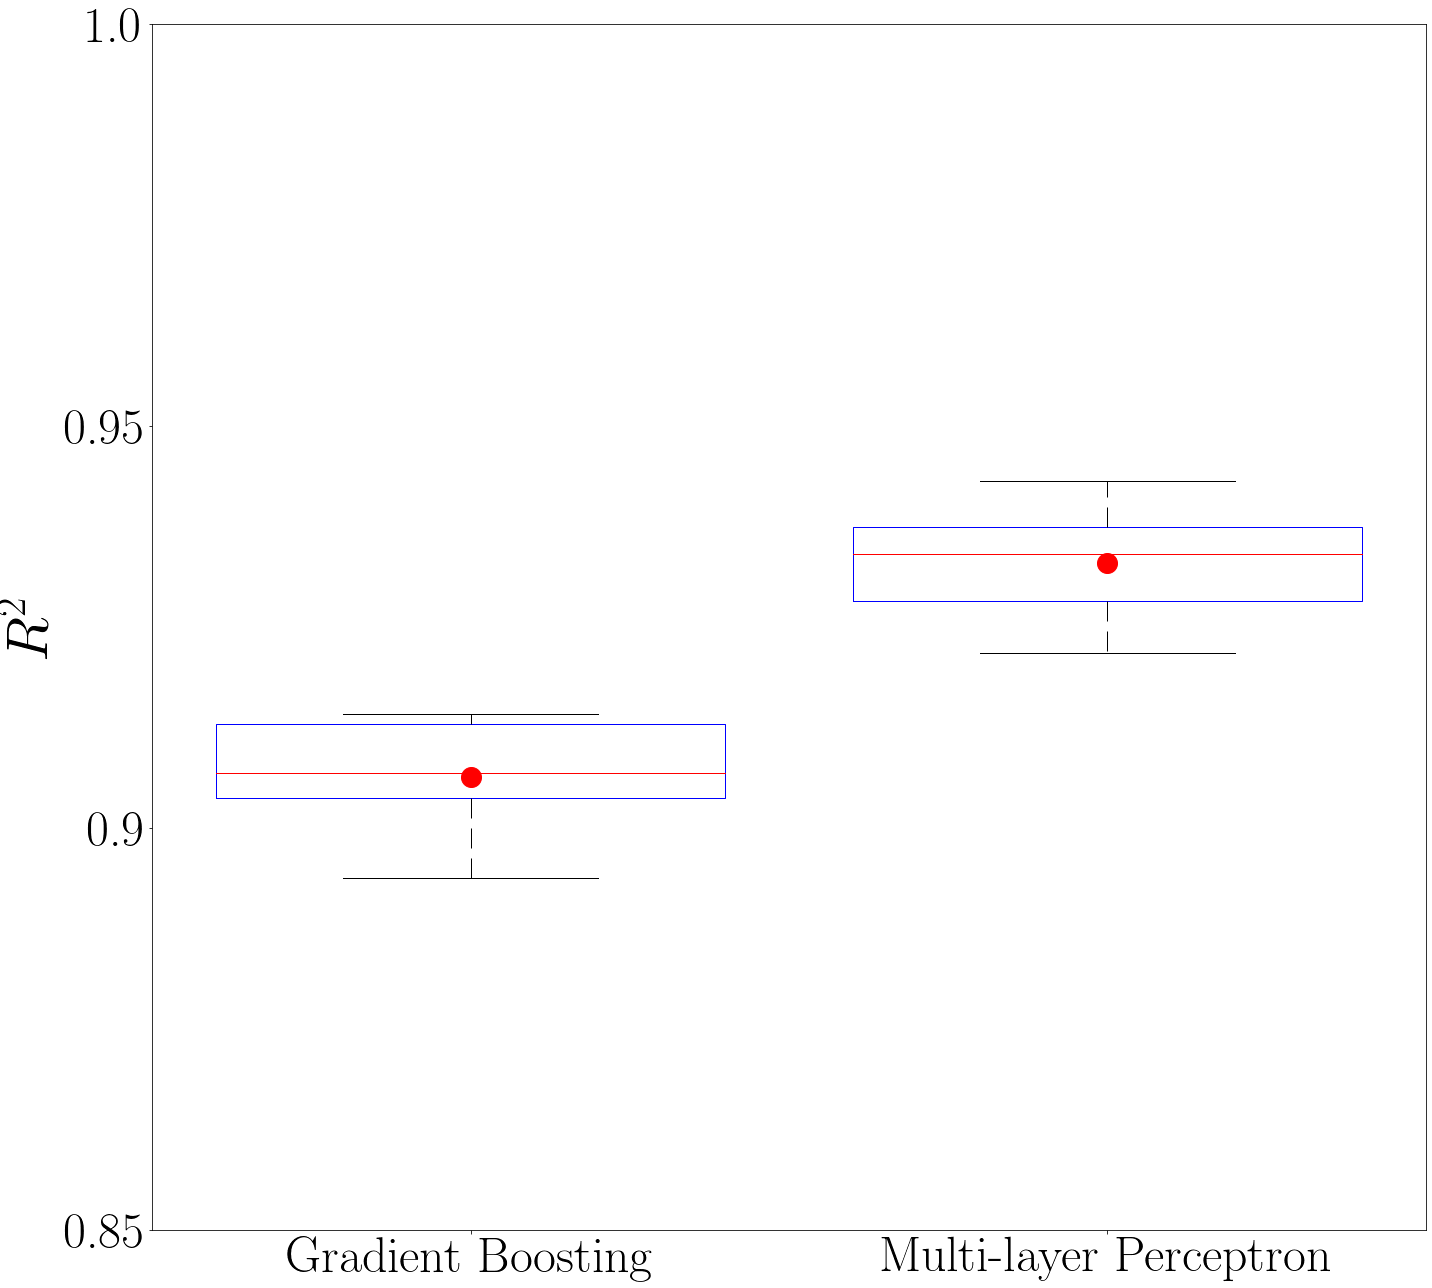

In [ ]:
fig, ax = plt.subplots(figsize=(20,18))
ynumbers = np.linspace(0.85,1.0,4) #scale of your x-axis
box_plot_data = [GBr2, MLPr2] #list your models in the order you want
label = ['Gradient Boosting','Multi-layer Perceptron'] #provide the label - this will be displayed on your x-axis

bp = ax.boxplot(box_plot_data,labels=label, widths = 0.8,vert=1,showmeans=True)
for box in bp['boxes']:
    # change outline color
    box.set(color='blue')
    # box.set(facecolor = 'white')
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black',linestyle='dashed',dashes=[20,10])

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='black')

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='red')

## change color and linewidth of the means
for mean in bp['means']:
    mean.set(marker='o',color='red')
    mean.set(markerfacecolor='red',markersize=20,markeredgecolor='red')


# linestyle='dashed', marker='o', markerfacecolor='blue', markersize=12

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='+', color='red')
    flier.set(markerfacecolor='red',markersize=20,markeredgecolor='red', alpha=1.0)
##don't border much stop

ax.set_xticklabels(label,fontsize=50)
plt.yticks(ynumbers)
ax.set_yticklabels(ynumbers,fontsize=50)
# ax.invert_xaxis()  # labels read top-to-bottom
ax.set_ylabel('$R^2$',fontsize=60)
fig.tight_layout()
plt.savefig("R2_All.jpg", format="jpg", dpi=900)
files.download('R2_All.jpg')